In [455]:
import numpy as np
import os
import pandas as pd
import csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import math
import scipy
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq, kmeans2, whiten
from scipy.misc import logsumexp

In [ ]:
dfcount = pd.read_table("docword.nips.txt", delimiter='\s+' ,header= None, skiprows=3)
dfword = pd.read_table("vocab.nips.txt", delimiter='\s+' ,header= None)

In [ ]:
D = 1500
W = 12419
N = 746316
n_blob = 30

In [ ]:
dfcount

In [ ]:
dfcluster = np.zeros((D,W))
#put the data into dataframe that is each doc X word get one cell

In [ ]:
for row in dfcount.iterrows():
    dfcluster[row[1][0]-1][row[1][1]-1] = row[1][2]


In [ ]:
dfcluster.shape

In [ ]:
print(dfcluster)

In [ ]:
dfcluster.shape

using k-mean package for  initializing
https://piazza.com/class/jchzguhsowz6n9?cid=982

In [ ]:
whitened = whiten(dfcluster)
codebook, distortion = kmeans(dfcluster, 30)
#doing k means clustering for initialing the probibleity of per cluster get words center, but some get zeros and later on have to do deviation so this cell is not using now

In [ ]:
print(codebook)

In [ ]:
codebook.shape

In [ ]:
type(codebook)

In [ ]:
blob_centers = codebook

In [ ]:
blob_centers.shape

In [ ]:
p = np.zeros((n_blob, W))
for i in range(n_blob):
    s = np.random.uniform(0,1,W)
    p[i,:] = s/sum(s) #over all word probibleity inside one cluster  has to sum to 1 (which is one row)
#instead we use random uniform distributio initialing the probibleity of each cluster for each words center
pi = np.full(n_blob, 1/n_blob)

In [ ]:
pi = np.full(n_blob, 1/n_blob)

In [ ]:
#p = np.zeros((n_blob, W))
#for i in range(n_blob):
#    for k in range(k)
#          p[i,:] = blob_centers[i,k]/sum(blob_centers[i,:])


In [ ]:
pi

In [ ]:
 p

In [ ]:
# e-step

#in the equation, the most inside sum you see where the summing over k
k_sum = np.dot(dfcluster,np.transpose(np.log(p)))

In [ ]:
k_sum 

In [ ]:
#in the equation, the most inside sum you see where the summing over ij


ij_sum =  np.zeros((D, n_blob))
for i in range(n_blob):
    ij_sum[:,i] = k_sum[:, i]+ np.log(pi[i])


In [ ]:
ij_sum

In [ ]:
#after this cell is getting w_ij

w_ij =  np.zeros((D, n_blob))


In [ ]:
maxrow = np.max(ij_sum, axis=1, keepdims=True)

In [ ]:
temp_ij_sum = ij_sum

temp_ij_sum

In [ ]:
from IPython.core.display import Image, display
display(Image('20180330_154755.jpg', unconfined=True))


In [ ]:
for i in range(D):
    log_wij[i] = logsumexp(temp_ij_sum[i,]-maxrow[i])

In [ ]:
maxrow

### log(wij)=log(numerator)−log(denominator)=log(αj)−logSumExp([α1,⋯,αn]).

In [ ]:
for i in range(n_blob):
    w_ij[:,i] = ij_sum[:,i]-maxrow.flatten()-log_wij.flatten()

In [ ]:
w_ij = np.exp(w_ij)

In [ ]:
new_mus = np.zeros((n_blob,W))
new_pies = np.zeros((n_blob))

In [ ]:
#M Step
for i in range(n_blob):
        new_mus[i,:] =  np.sum(dfcluster*w_ij[:,i].reshape(D,1), axis=0)/np.sum(np.sum(dfcluster)*w_ij[:,i])
        new_pies[i] = np.sum(w_ij[:,i])/D
#get the new mus and pie

In [ ]:
temp_ij_sum

In [ ]:
np.sum(dfcluster*w_ij[:,i,np.newaxis], axis=0)

In [ ]:
np.sum(dfcluster*w_ij[:,i].reshape(D,1), axis=0)

In [ ]:
Q = w_ij * ij_sum

In [ ]:
Q

In [ ]:
#run this two for the first time
w_ij =  np.zeros((D, n_blob))
ij_sum =  np.zeros((D, n_blob))
p = np.zeros((n_blob, W))

In [ ]:

p= blob_centers+.0000000001       
for i in range(n_blob):
    p[i,:] =p[i,:]/sum(p[i,:])
pi = np.full(n_blob, 1/n_blob)

In [ ]:
a = [Q]

In [ ]:

k_sum = np.dot(dfcluster,np.transpose(np.log(p)))
for i in range(n_blob):
    ij_sum[:,i] = k_sum[:, i]+ np.log(pi[i])
maxrow = np.max(ij_sum, axis=1, keepdims=True)
temp_ij_sum = ij_sum
for i in range(D):
    log_wij[i] = logsumexp(temp_ij_sum[i,]-maxrow[i])
for i in range(n_blob):
    w_ij[:,i] = ij_sum[:,i]-maxrow.flatten()-log_wij.flatten()
w_ij = np.exp(w_ij)
for i in range(n_blob):
        p[i,:] =  np.sum(dfcluster*w_ij[:,i].reshape(D,1), axis=0)/np.sum(np.sum(dfcluster)*w_ij[:,i])
        pi[i] = np.sum(w_ij[:,i])/D


In [ ]:
p= p+.0000000001       
for i in range(n_blob):
    p[i,:] =p[i,:]/sum(p[i,:])

In [ ]:
pi

In [ ]:
p

In [ ]:
p = np.zeros((n_blob, W))
for i in range(n_blob):
    s = np.random.uniform(0,1,W)
    p[i,:] = s/sum(s) #over all word probibleity inside one cluster  has to sum to 1 (which is one row)
#instead we use random uniform distributio initialing the probibleity of each cluster for each words center
pi = np.full(n_blob, 1/n_blob)

In [ ]:
p= blob_centers+.0000000001       
for i in range(n_blob):
    p[i,:] =p[i,:]/sum(p[i,:])

In [ ]:
pi = np.full(n_blob, 1/n_blob)

In [ ]:
from scipy.stats import rankdata
temp = rankdata(p[0], method='ordinal')

In [ ]:
for j in range(n_blob):
    print("====this is the data blob", j)
    for i in range(12419, 12409, -1):
        print(dfword.iloc[np.where((rankdata(p[j], method='ordinal'))==i)][0].values[0])

In [ ]:
a = pi
N = len(a)
b = range(N)
width = 1/1.5
plt.bar(b, a, width, color="blue")
plt.show()

In [ ]:
#problem 2

In [3]:
im1 = scipy.misc.imread('RobertMixed03.jpg')

In [363]:
import copy
p = copy.deepcopy(codebook)
pi = np.full(n_blob, 1/n_blob)

In [380]:
output = np.zeros((im1.size/3, 3))

C:\Users\titus\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


this is the original image with


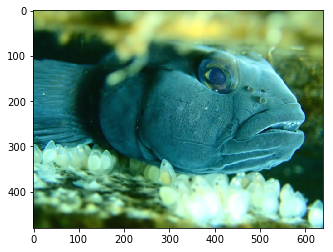

this is the image with 10 number of cluser


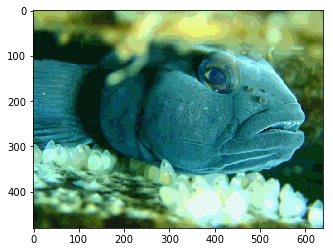

this is the image with 20 number of cluser


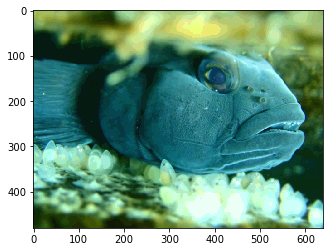

this is the image with 30 number of cluser


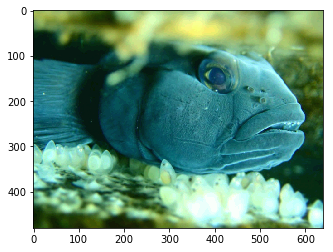

In [457]:
print("this is the original image with")
plt.imshow(im1)
plt.show()
n_blob_count = [10, 20, 30] #three level of number of cluster
for l in range(len(n_blob_count)):
    n_blob = n_blob_count[l]
    #e-step
    for j in range(3): #deveide into three color layers
        im1a = im1[:,:,j].astype(np.float64).flatten() #put it into one array for process
        codebook, distortion = kmeans(im1a, n_blob) #k means for center
        p = copy.deepcopy(codebook)
        pi = np.full(codebook.size, 1/codebook.size) #assign evey pi in the cuslter has the same probability
        for k in range(5):
            ij_sum = np.zeros((im1a.size, codebook.size)) 
            for i in range(codebook.size):
                dis = im1a-p[i]
                ij_sum[:, i] =(-(1/2)*dis*dis) #get the inner ij sum, which is the x-mu*x-mu *(1/2)in the equation
            log_wij = np.dot(np.exp(ij_sum), np.diag(pi))  #get the upper part of the w_ij, which is exp of the ij_sum * pi
            w_ij = log_wij[:]/ np.sum(log_wij[:], axis=0)
            #m-step
            for i in range(codebook.size):
                    p[i] = np.sum(im1a*w_ij[:,i])/np.sum(w_ij[:,i]) #get p
                    pi[i] = np.sum(w_ij[:,i])/im1a.size #get pi
            pi= pi+.000000000001       #get a small constant for pi so it doesnt get to 0
            pi[:] =pi[:]/sum(pi[:])
        p = np.around(p)
        for i in range(im1a.size):
            output[i,j] =  min(p, key=lambda x:abs(x-im1a[i])) #find the closest number of the list of p map to pixel
    outputim = np.zeros((im1.shape[0], im1.shape[1], 3))
    for j in range(3):
        outputim[:,:,j] = output[:,j].reshape((im1.shape[0], im1.shape[1])) #reshape to get all 3 color back to the one image
    print("this is the image with "+ str(n_blob_count[l]) +" number of cluser")
    plt.imshow(outputim.astype(np.uint8) )
    plt.show()